# Pré-processamento de dados

Arquivo MC1 de "PROMISE Software Engineering Repository"

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek
smk = SMOTETomek()


def select_data_trein(data_column_list, class_column_list):
    # Ler dados de treinamento e avaliação
    df = pd.read_csv('../_data/mc1.csv', sep = ',', index_col = None)

    # Manter apenas a(s) coluna(s) que será(ão) treinada(s) no modelo
    df.drop(df.columns.difference(data_column_list + class_column_list), 1, inplace = True)

    # Converter coluna TRUE/FALSE para 1/0 (True e False respectivamente em Python)
    df[class_column_list] *= 1
    
    # Gráfico mostrando dados desbalanceados
    sns.countplot(x = class_column_list[0], data = df)
    plt.show()

    # Matriz de variáveis independentes
    df_independ = df.drop(class_column_list, 1)

    # Matriz de variáveis dependentes
    df_depend_defects = df.drop(df.columns.difference(class_column_list), 1)

    # Rebalanceamento
    df_depend_defects_res, df_independ_defects_res = smk.fit_sample(df_independ, df_depend_defects)

    # Remontar o conjunto de dados com as variáveis dependentes e independente rebalanceadas
    df_res = pd.concat([df_depend_defects_res, df_independ_defects_res], axis = 1)

    # Gráfico mostrando dados balanceados
    sns.countplot(x = class_column_list[0], data = df_res)
    plt.show()

    # Salvar para processamento
    df_res.to_csv('../_pre/_pre.csv', index = False)

# Processamento de dados

In [2]:
import time
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pycm import ConfusionMatrix as cm, Compare as comp

import os
import datetime as dt
from time import perf_counter

from igel import Igel

import logging


def select_data_prev(data_column_list, class_column_list):
    # Carregar dados para previsão
    df = pd.read_csv('../_data/pc2.csv', sep = ',', index_col = None)

    # Converter coluna TRUE/FALSE para 1/0 (True e False respectivamente em Python)
    df[class_column_list] *= 1

    # Remover coluna com dados aferidos atualmente
    df_original = df.filter(class_column_list, axis = 1)

    # Salvar para previsão
    df_original.to_csv('../_pre/_original.csv', index = False)

    # Manter apenas a(s) coluna(s) que será(ão) usada(s) na previsão
    df.drop(df.columns.difference(data_column_list), 1, inplace = True)
    
    # Salvar no arquivo para previsão
    df.to_csv('../_pre/_copy.csv', index = False)

# Função para o experimento
# @param_file - Arquivo de parâmetros com a configuração para o scikit-learn
# @prefix - Prefixo dos arquivos que serão gerados com os dados do experimento
def execute_experiment(class_column, param_file, prefix):
    
    t_start = perf_counter()
    
    # TREINAMENTO
    params = {
        'cmd': 'fit',
        'data_path': '../_pre/_pre.csv',
        'yaml_path': '../igel/' + param_file +'.yaml'
    }
    Igel(**params)

    # AVALIAÇÃO
    params = {
        'cmd': 'evaluate',
        'data_path': '../_pre/_pre.csv',
        'yaml_path': '../igel/' + param_file +'.yaml'
    }
    Igel(**params)

    # PREVISÃO
    params = {
        'cmd': 'predict',
        'data_path': '../_pre/_copy.csv',
        'yaml_path': '../igel/' + param_file +'.yaml'
    }
    Igel(**params)

    t_stop = perf_counter()
    
    elapsed_time = t_stop - t_start
    
    # COMPARAÇÃO DOS RESULTADOS
    df_original = pd.read_csv('../_pre/_original.csv', sep=',', index_col=None)
    df_predictions = pd.read_csv('./model_results/predictions.csv', sep=',', index_col=None)
    cols = df_predictions.columns
    df_predictions[cols] = df_predictions[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'unsigned')
    
    # Matriz de confusão dos defeitos previstos
    defects_cm = cm(actual_vector = df_original[class_column].to_numpy(), predict_vector = df_predictions[class_column].to_numpy())
    
    # MOVER EXPERIMENTO PARA UMA PASTA SEPARADA
    current_date = dt.datetime.today().strftime ('%Y-%m-%d-%H-%M-%S')
    os.rename(r'./model_results', r'./.result_' + prefix + '_' + str(current_date))
    
    return {
        'elapsed_time': elapsed_time,
        'defects_cm': defects_cm
    }

# Desligar o log de mensagens
logging.getLogger('igel').setLevel(logging.ERROR)

# Lista de experimentos
labels = [ 
    'Adaboost',
    'Bagging',
    'BernoulliNaiveBayes',
    'CalibratedClassifier',
    'DecisionTree',
    'ExtraTree',
    'ExtraTrees',
    'GaussianNaiveBayes',
    'GradientBoosting',
    'LinearSVM',
    'LogisticRegression',
    'NearestNeighbor',
    'NeuralNetwork',
    'PassiveAgressiveClassifier',
    'Perceptron',
    'RandomForest',
    'Ridge',
    'SVM',
]

# Prefixos para arquivos
prefix = [
    'A',
    'B',
    'BNB',
    'CC',
    'DT',
    'ET',
    'ETS',
    'GNB',
    'GB',
    'LSVM',
    'LR',
    'NN',
    'NNE',
    'PC',
    'P',
    'RF',
    'R',
    'SVM',    
]

# Experimento

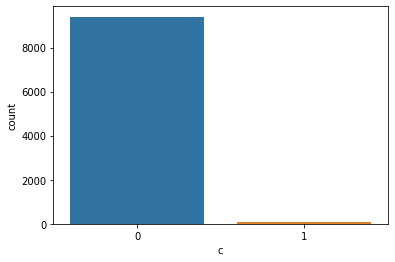

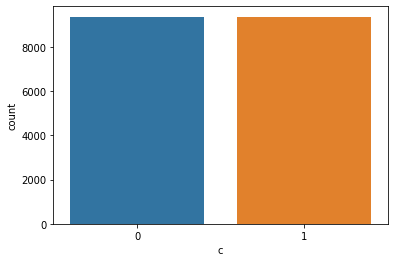

{'elapsed_time': 0.9274833260000008, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 0.8036541190000008, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 0.30937246399999907, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 3.958707256000004, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 0.1924804279999961, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 0.15764295799999672, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 1.2587905190000015, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 0.20471455999999932, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 2.292524517000004, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 1.296218471000003, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed_time': 0.22818327800000304, 'defects_cm': pycm.ConfusionMatrix(classes: [0, 1])}
{'elapsed

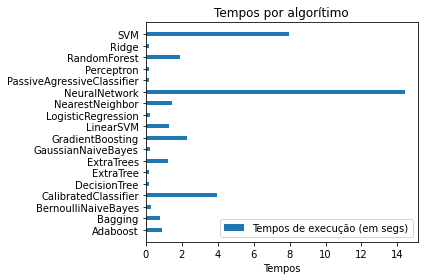

In [3]:
# Executa experimentos
# 'HALSTEAD_CONTENT'
# 'HALSTEAD_DIFFICULTY'
# 'HALSTEAD_EFFORT'
# 'HALSTEAD_ERROR_EST'
# 'HALSTEAD_LENGTH'
# 'HALSTEAD_LEVEL'
# 'HALSTEAD_PROG_TIME'
# 'HALSTEAD_VOLUME'

# Criar lista para guardar resultados de todos experimentos
result = [0] * 18

select_data_trein(['HALSTEAD_CONTENT','HALSTEAD_DIFFICULTY','HALSTEAD_EFFORT','HALSTEAD_ERROR_EST','HALSTEAD_LENGTH','HALSTEAD_LEVEL','HALSTEAD_PROG_TIME','HALSTEAD_VOLUME'], ['c'])
select_data_prev(['HALSTEAD_CONTENT','HALSTEAD_DIFFICULTY','HALSTEAD_EFFORT','HALSTEAD_ERROR_EST','HALSTEAD_LENGTH','HALSTEAD_LEVEL','HALSTEAD_PROG_TIME','HALSTEAD_VOLUME'], ['c'])
for i, alg in enumerate(labels):
    result[i] = execute_experiment('c', 'classification_' + alg, prefix[i])
    print(result[i])

# Gráfico de execução
elapsed_times = [k['elapsed_time'] for k in result]
x = np.arange(len(labels))
width = .35
fig, ax = plt.subplots()
rects_elapsed_times = ax.barh(x, elapsed_times, width, label='Tempos de execução (em segs)')
ax.set_xlabel('Tempos')
ax.set_title('Tempos por algorítimo')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

# Análise dos resultados

MCC, ACC
{0: 0.04461832252010198, 1: 0.04461832252010198} {0: 0.5233494363929146, 1: 0.5233494363929146}
{0: 0.07220554182412617, 1: 0.07220554182412617} {0: 0.9003399534800501, 1: 0.9003399534800501}
{0: 0.10916894759370609, 1: 0.10916894759370609} {0: 0.8073000536768653, 1: 0.8073000536768653}
{0: 0.059921673690513315, 1: 0.059921673690513315} {0: 0.6278404007872607, 1: 0.6278404007872607}
{0: 0.1100645320995901, 1: 0.1100645320995901} {0: 0.8751118268026481, 1: 0.8751118268026481}
{0: 0.051100976932848374, 1: 0.051100976932848374} {0: 0.7978171408123099, 1: 0.7978171408123099}
{0: 0.10950478368683883, 1: 0.10950478368683883} {0: 0.9364823760959027, 1: 0.9364823760959027}
{0: 0.09166875051326182, 1: 0.09166875051326182} {0: 0.7963857577384147, 1: 0.7963857577384147}
{0: 0.029270830101061285, 1: 0.029270830101061285} {0: 0.3993558776167472, 1: 0.3993558776167472}
{0: 0.05470028534924324, 1: 0.05470028534924324} {0: 0.6308820898192878, 1: 0.6308820898192878}
{0: 0.0530321370465056, 1: 

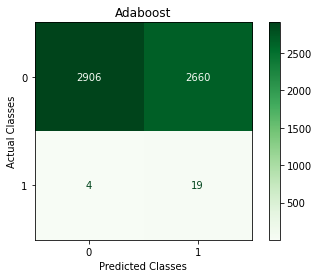

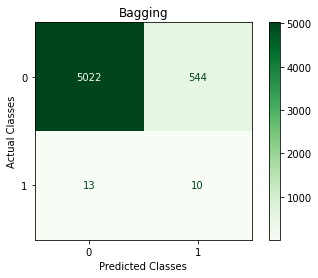

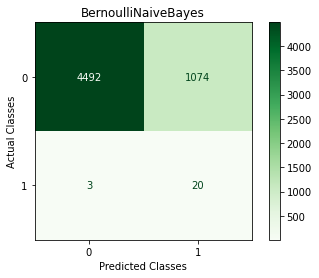

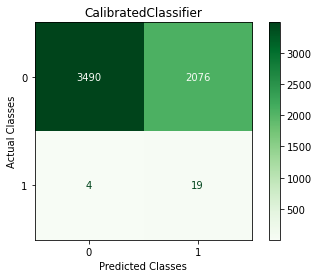

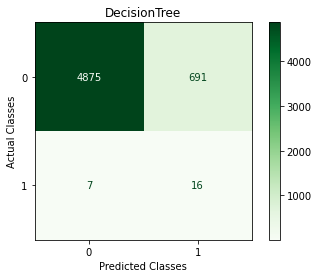

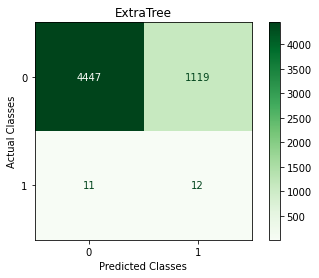

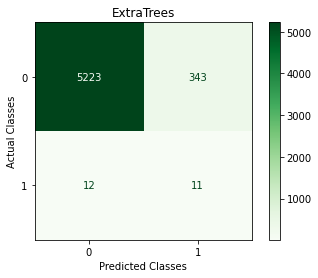

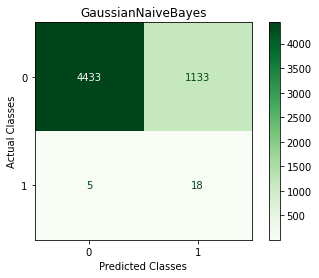

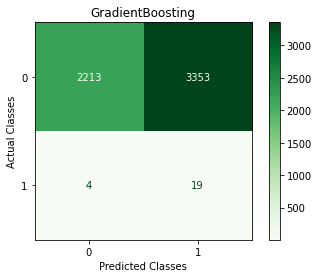

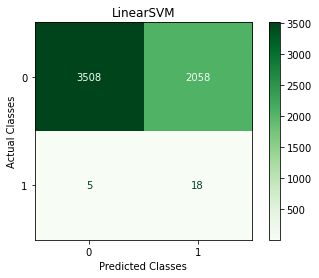

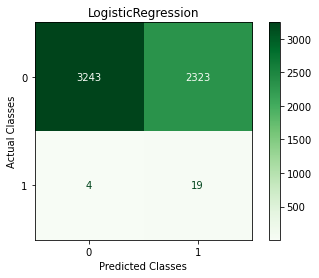

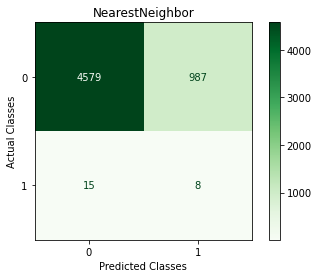

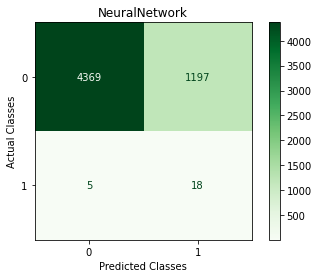

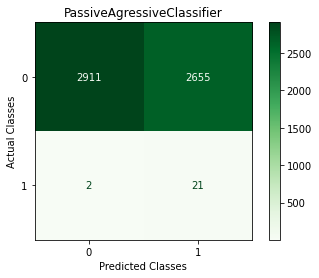

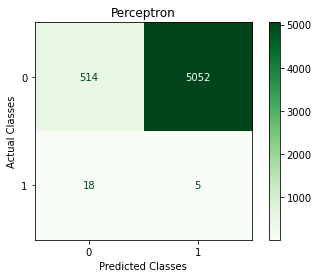

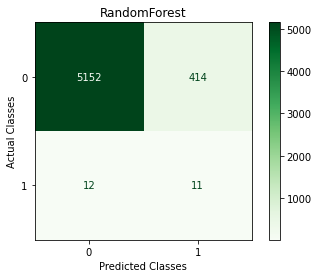

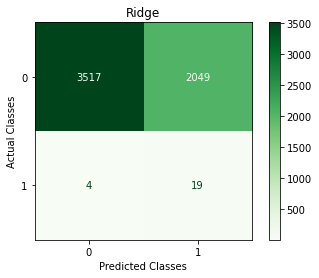

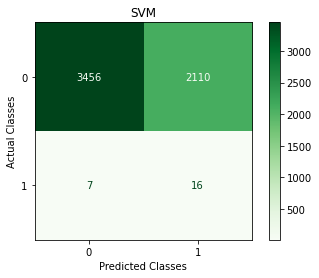

In [6]:
# Cria dicionário com todos os resultados obtidos
experiment = {}
print('MCC,','ACC')
for i, alg in enumerate(labels):
    experiment[alg] = result[i]['defects_cm']
    print(result[i]['defects_cm'].MCC,result[i]['defects_cm'].ACC)

# Faz um comparativo de todos via análise da matriz de confusão
cp = comp(experiment)
print(cp)

# Matriz de confusão
for i, alg in enumerate(labels):
    result[i]['defects_cm'].plot(cmap = plt.cm.Greens, number_label = True, title = alg, plot_lib = 'matplotlib')

plt.show()

> This is the end